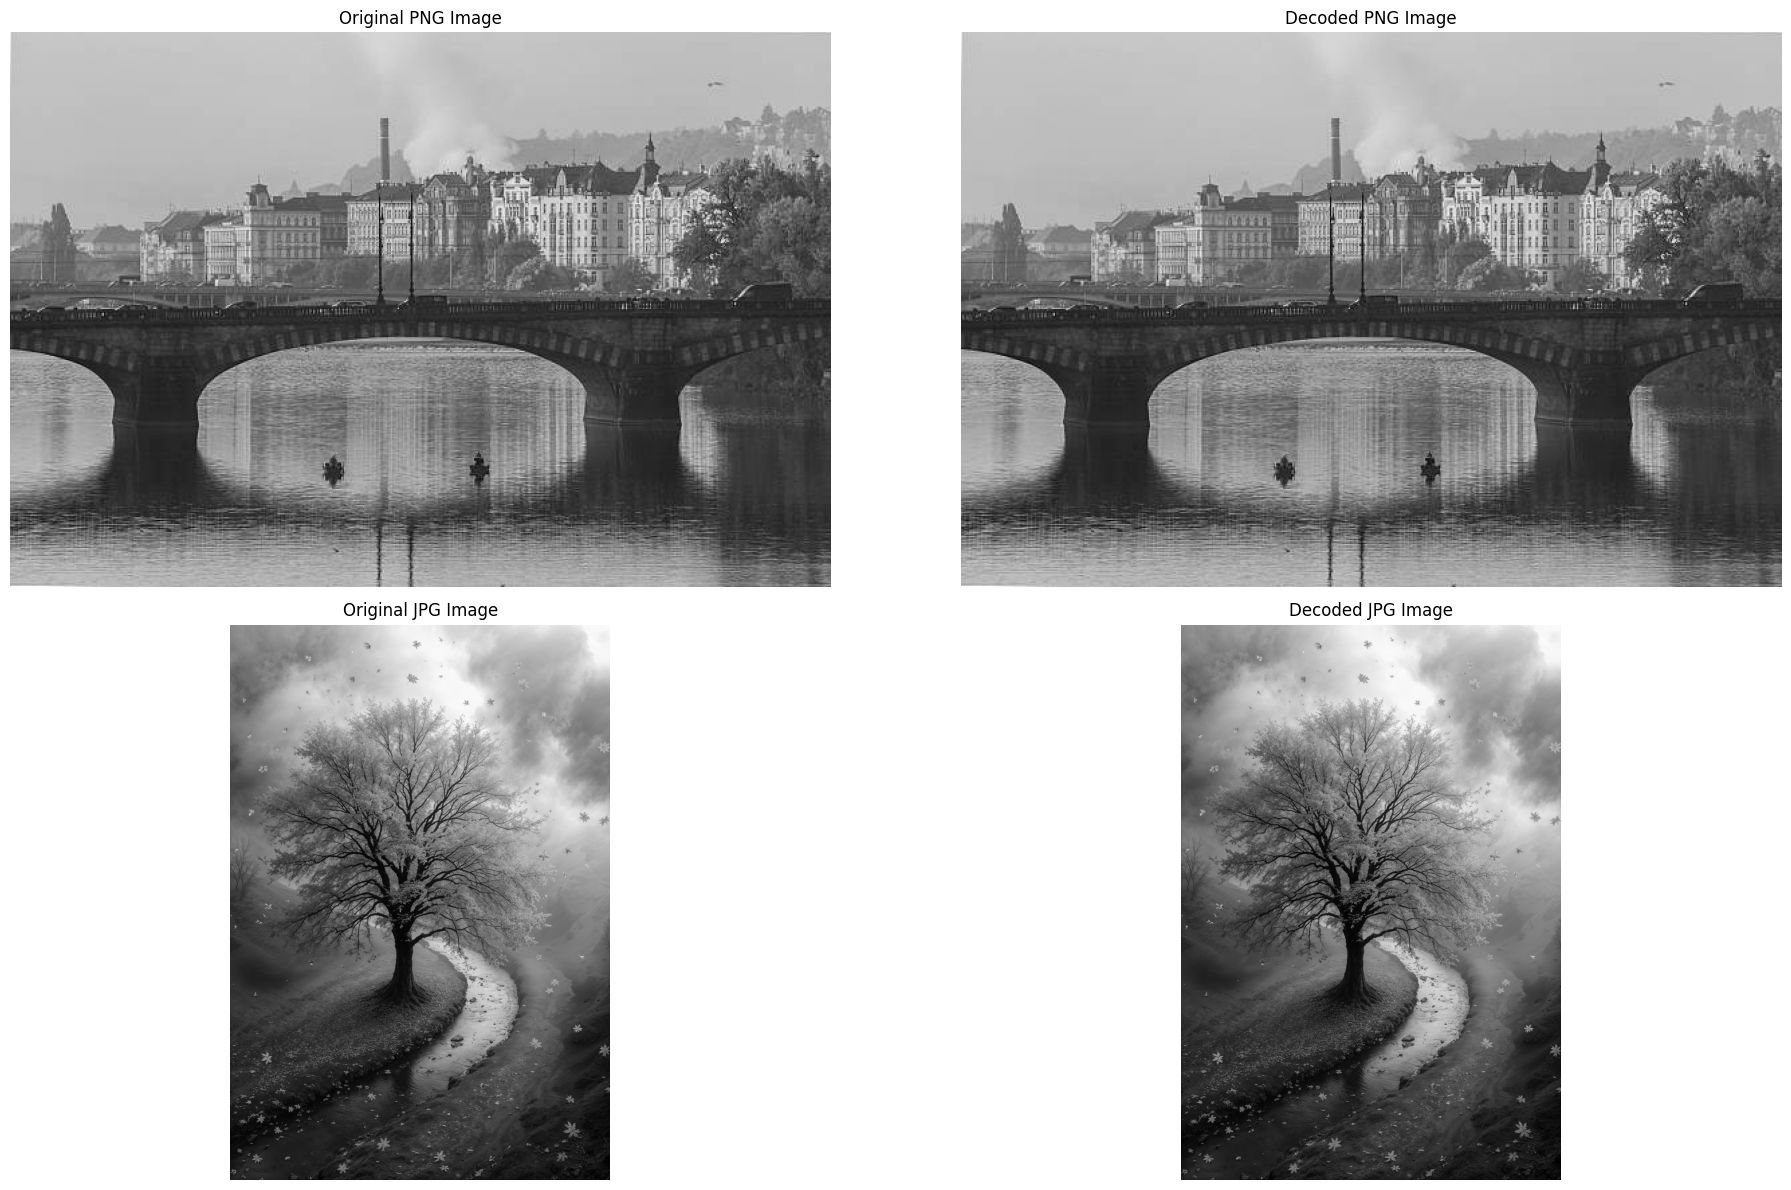

In [12]:
import numpy as np
import heapq
from collections import defaultdict
import cv2
import matplotlib.pyplot as plt

r=2
c=2
cnt=0
class Node:
    def __init__(self, symbol, freq):
        self.symbol=symbol
        self.freq=freq
        self.left=None
        self.right=None

    def __lt__(self, other):
        return self.freq < other.freq

def build_frequency(image):
    freq=defaultdict(int)
    for pixel in image.flatten():
        freq[pixel] += 1
    return freq

def build_huffman_tree(freq_dict):
    heap = []
    for symbol, freq in freq_dict.items():
        heap.append(Node(symbol, freq))
 
    heapq.heapify(heap)
    while len(heap) > 1:
        node1=heapq.heappop(heap)
        node2=heapq.heappop(heap)
        merged=Node(None, node1.freq + node2.freq)
        merged.left=node1
        merged.right=node2
        heapq.heappush(heap, merged)
    return heap[0]

def generate_codes(node, current_code="", code_dict={}):
    if node is None:
        return
    if node.symbol is not None:
        code_dict[node.symbol]=current_code
        return
    generate_codes(node.left, current_code + "0", code_dict)
    generate_codes(node.right, current_code + "1", code_dict)
    return code_dict

def encode_image(image, code_dict):
    encoded=""
    for pixel in image.flatten():
        encoded += code_dict[pixel]
    return encoded

def decode_image(encoded, root, shape):
    decoded_pixels=[]
    node=root
    for bit in encoded:
        node=node.left if bit == "0" else node.right
        if node.symbol is not None:
            decoded_pixels.append(node.symbol)
            node=root
    return np.array(decoded_pixels).reshape(shape)


def show_image(image, title):
    global cnt
    cnt += 1
    plt.subplot(r, c, cnt)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

def main():
    path_1="Image/low_contrast/image6.png"
    # path_2="Image/high_contrast/image6.jpg"
    # path_1="Image/png_image.png"
    path_2="Image/jpg_image.jpg"

    # Using gray scale images for simplicity
    image_png=cv2.imread(path_1, cv2.IMREAD_GRAYSCALE)
    image_jpg=cv2.imread(path_2, cv2.IMREAD_GRAYSCALE)

    # For PNG Image

    # frequency dictionary
    freq_dict_png=build_frequency(image_png)
    # Huffman Tree
    root_png=build_huffman_tree(freq_dict_png)
    # code dictionary
    code_dict_png=generate_codes(root_png)
    # encoding
    encoded_png=encode_image(image_png, code_dict_png)
    # decoding
    decoded_image_png=decode_image(encoded_png, root_png, image_png.shape)


    plt.figure(figsize=(20, 12))
    show_image(image_png, "Original PNG Image")
    show_image(decoded_image_png, "Decoded PNG Image")

    # For JPG Image
    # frequency dictionary
    freq_dict_jpg=build_frequency(image_jpg)
    # Huffman Tree
    root_jpg=build_huffman_tree(freq_dict_jpg)
    # code dictionary
    code_dict_jpg=generate_codes(root_jpg)
    # encoding
    encoded_jpg=encode_image(image_jpg, code_dict_jpg)
    # decoding
    decoded_image_jpg=decode_image(encoded_jpg, root_jpg, image_jpg.shape)
    
    show_image(image_jpg, "Original JPG Image")
    show_image(decoded_image_jpg, "Decoded JPG Image")

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()
